In [1]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
def feature_importances(coef, names, ax):
    '''
    Function used to plot the feature weights
    
    Inputs:
        coef: Feature weights
        name: Feature names
        ax: Plot axis
    '''
    coef, names = zip(*sorted(zip(coef, names)))
    ax.barh(range(len(names)), coef, align='center')

This notebook aims to prove that when using a kernel trick the weights assigned to the features can still be computed. 
We will start by performing a support vector regression using a liner kernel. With this method the weights are returned by the sklearn library. On the second session we calculate the kernel using a gram matrix and use this as an input to the support vector regression. Once the model is fitted we compare the results obtained between both SVM methods.  


## Load Dataset

In [3]:
data = load_boston()

In [4]:
X = data['data']
y = data['target']

In [5]:
# Get a fealing for the dataset
print('Shape of data {}'.format(X.shape))

Shape of data (506, 13)


In [6]:
# Split the dataset into training and test
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, 
                                                                         indices, test_size=0.33, 
                                                                         random_state=42)
print('Shape of trainig data {}'.format(X_train.shape))
print('Shape of test data {}'.format(X_test.shape))

Shape of trainig data (339, 13)
Shape of test data (167, 13)


## Create linear classifier

In [7]:
clf = SVR(kernel='linear')
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# Check the performance of the regression
y_predicted = clf.predict(X_test)
r2_score(y_test, y_predicted)

0.6703440070785831

In [9]:
# Analyse some of the attributes returned by the SVR function

# get indices of support vectors
idx_support = clf.support_
print('Shape of the support vectors {}'.format(idx_support.shape))

# Weights of the features
coef = clf.coef_
print('Shape of the weights assigned to the features {}'.format(coef.shape))
print(coef)

Shape of the support vectors (334,)
Shape of the weights assigned to the features (1, 13)
[[-1.54165575e-01  4.14961460e-02  3.36275807e-02  7.88815499e-01
  -1.27721012e+00  5.78799760e+00 -4.72967614e-02 -1.03866821e+00
   5.83234847e-02 -4.84806316e-03 -6.06467745e-01  1.48903230e-02
  -3.41008345e-01]]


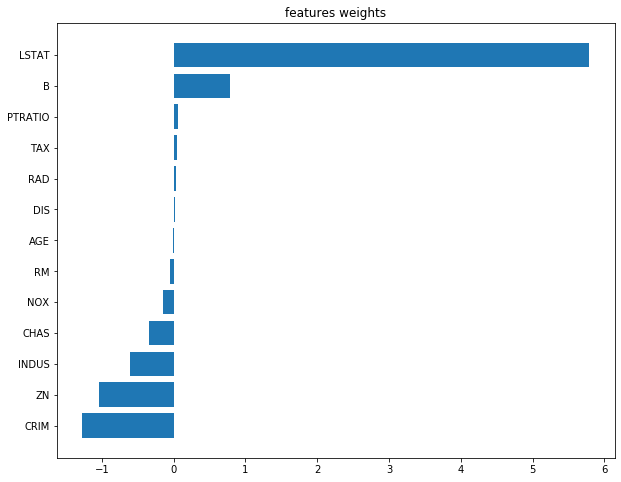

In [10]:
# get feature names for the the data
names = data['feature_names']

# Plot the weights of the different features obtained with SVR
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.set_title('features weights')
feature_importances(np.squeeze(clf.coef_), names, ax)
ax.yaxis.set_major_locator(ticker.FixedLocator((range(len(names)))))
ax.yaxis.set_major_formatter(ticker.FixedFormatter((names)))


## Use SVM with pre-computed kernel

In [11]:
# Compute the linear kernel to test our seocnd approach
kernel = np.dot(X, np.transpose(X))

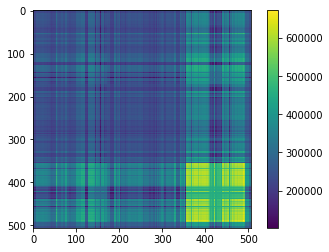

In [12]:
# Just for fun, visualise kernel
plt.imshow(kernel)
plt.colorbar()

In [13]:
# Compute SVR with the precomputed kernel
clf_kernel = SVR(kernel='precomputed')
clf_kernel.fit(kernel[idx_train[:, None], idx_train], y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='precomputed', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
# Check the performance of the regression
y_predicted = clf_kernel.predict(kernel[idx_test[:, None], idx_train])
r2_score(y_test, y_predicted)

0.6703502889375416

In [15]:
# Analyse some of the attributes returned by the SVR function

# get indices of support vectors
idx_support = clf_kernel.support_
print('Shape of the support vectors {}'.format(idx_support.shape))

Shape of the support vectors (334,)


In [16]:
# Calculate the weight's coefficients
coef_kernel = np.dot(clf_kernel.dual_coef_, X_train[clf_kernel.support_])

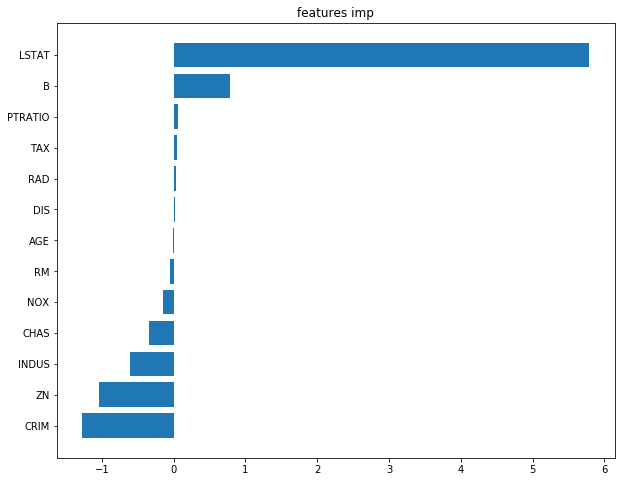

In [17]:
# Similarly, to the approach above calculate the featuer importance
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.set_title('features imp')
feature_importances(np.squeeze(coef_kernel), names, ax)
ax.yaxis.set_major_locator(ticker.FixedLocator((range(len(names)))))
ax.yaxis.set_major_formatter(ticker.FixedFormatter((names)))

In [18]:
# Check if they computed weights are equivalent between both approaches
print('Weights Coefficients calculated with the linear kernel:')
print(coef)
print('Weights Coefficients calculated with the gram matrix kernel:')
print(coef_kernel)

Weights Coefficients calculated with the linear kernel:
[[-1.54165575e-01  4.14961460e-02  3.36275807e-02  7.88815499e-01
  -1.27721012e+00  5.78799760e+00 -4.72967614e-02 -1.03866821e+00
   5.83234847e-02 -4.84806316e-03 -6.06467745e-01  1.48903230e-02
  -3.41008345e-01]]
Weights Coefficients calculated with the gram matrix kernel:
[[-1.54164971e-01  4.14952932e-02  3.36284711e-02  7.88822837e-01
  -1.27721075e+00  5.78800670e+00 -4.72977652e-02 -1.03866723e+00
   5.83270422e-02 -4.84807102e-03 -6.06471098e-01  1.48885299e-02
  -3.41007560e-01]]
